In [15]:
import sys

# Replace this with the path to the repository
sys.path.append("/home/zhenhao/ETFMH/")

In [16]:
from db_sketching.genome_selection import GenomeFiltering
from db_sketching.kmer_set import KMerSet, FracMinHash


def cond(kmer_hash):
    hash = (976369 * kmer_hash + 1982627) % 10000
    if hash < 100:
        return True
    else:
        return False

kmer_set = FracMinHash(cond, 12, True)
gf = GenomeFiltering(kmer_set)

In [17]:
from glob import glob

for f in glob("../data/Staphylococcus_data/train/*/*.fna"):
    gf.insert_genome(f)
    print(f)

../data/Staphylococcus_data/train/Staphylococcus sp022815905/GCA_022815835.1.fna
../data/Staphylococcus_data/train/Staphylococcus sp022815905/GCA_022815825.1.fna
../data/Staphylococcus_data/train/Staphylococcus sp022815905/GCA_022815905.1.fna
../data/Staphylococcus_data/train/Staphylococcus sp022815905/GCA_022815865.1.fna
../data/Staphylococcus_data/train/Staphylococcus devriesei/GCA_002902625.1.fna
../data/Staphylococcus_data/train/Staphylococcus devriesei/GCA_021367215.1.fna
../data/Staphylococcus_data/train/Staphylococcus devriesei/GCA_900458355.1.fna
../data/Staphylococcus_data/train/Staphylococcus devriesei/GCA_003578115.1.fna
../data/Staphylococcus_data/train/Staphylococcus devriesei/GCA_003578105.1.fna
../data/Staphylococcus_data/train/Staphylococcus devriesei/GCA_003035795.1.fna
../data/Staphylococcus_data/train/Staphylococcus devriesei/GCA_003035765.1.fna
../data/Staphylococcus_data/train/Staphylococcus devriesei/GCA_003035825.1.fna
../data/Staphylococcus_data/train/Staphyloco

In [18]:
import pickle

with open("staphylococcus.pkl", "wb") as f:
    pickle.dump(gf, f)

In [19]:
import numpy as np

genome_list = list(gf.genome_dict.keys())
distance_matrix = np.zeros((len(genome_list), len(genome_list)))
for i in range(len(genome_list)):
    for j in range(i+1, len(genome_list)):
        distance = gf.genome_dict[genome_list[i]].resemblence(gf.genome_dict[genome_list[j]])
        distance_matrix[i][j] = distance_matrix[j][i] = 1 - distance

<Axes: >

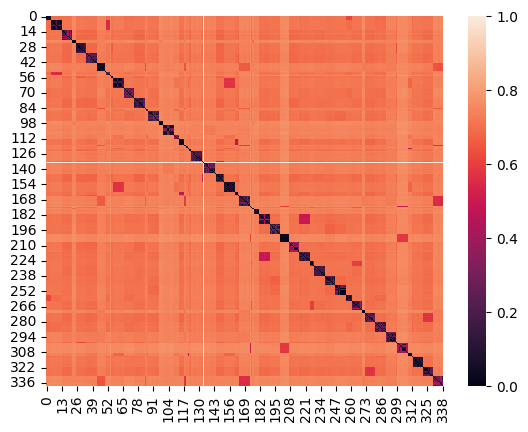

In [20]:
import seaborn

seaborn.heatmap(distance_matrix)

In [21]:
with open("pairwise_distance.pkl", "wb") as f:
    pickle.dump(distance_matrix, f)

In [22]:
len(gf.hierarchical_clustering(genome_list, distance_matrix, 0.4))

78

In [23]:
hc = gf.hierarchical_clustering(genome_list, distance_matrix, 0.4)
hc

[[0, 1, 2, 3],
 [4, 5, 6, 7, 8, 9, 10, 11, 12],
 [18, 20],
 [13, 14, 15, 16, 17, 19, 21],
 [22, 23, 24],
 [25, 26, 27, 28, 29, 30, 31, 32, 33],
 [34, 35, 36, 37, 38, 39, 40, 41, 42],
 [43, 44, 45, 46, 47, 48, 49],
 [50],
 [51, 52, 53],
 [54],
 [55, 56],
 [57, 58, 59, 60, 61, 62, 63, 64, 65],
 [67, 70, 72, 73],
 [66, 68, 69, 71, 74],
 [75, 76, 77, 78, 79, 80, 81, 82, 83],
 [84],
 [85, 86],
 [91],
 [87, 88, 89, 90, 92, 93, 94, 95],
 [96, 97, 98, 99],
 [100, 101, 102, 103, 104, 105, 106, 107, 108],
 [109],
 [111],
 [110, 112],
 [113, 114, 115, 116, 117],
 [118],
 [119, 120],
 [121],
 [122, 123],
 [124, 125, 126, 127, 128, 129, 130, 131, 132],
 [133],
 [134],
 [138],
 [135, 136, 137, 139, 140, 141, 142, 143],
 [144],
 [145, 146, 147, 148, 149, 150],
 [151],
 [152, 153, 154, 155, 156, 157, 158, 159, 160],
 [161, 162, 163],
 [164],
 [165, 166, 167, 168, 169, 170, 171, 172, 173],
 [174],
 [175],
 [176],
 [177, 178, 179, 180, 181],
 [186],
 [182, 183, 184, 185, 187, 188, 189, 190],
 [192, 195]

In [24]:
# Naive way of selecting signature
from collections import Counter

naive_counter = Counter()

for f in genome_list:
    naive_counter.update(list(gf.genome_dict[f].set))


In [25]:
len(naive_counter)

78658

<Axes: ylabel='Count'>

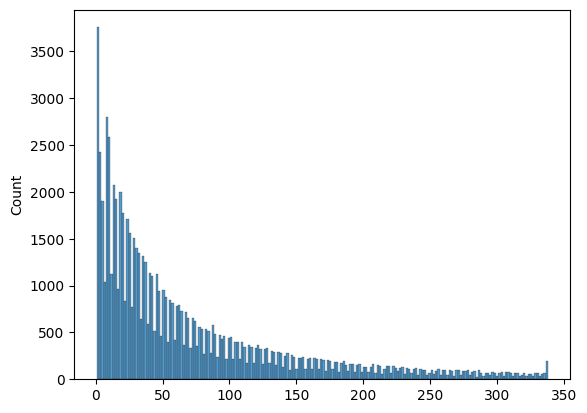

In [26]:
import seaborn

seaborn.histplot([i for i in list(naive_counter.values()) if i >= 0], bins=200)

In [27]:
# After hierarchical clustering
import random
hc_counter = Counter()

for j in hc:
    sampled_genome = random.sample(j, 1)
    print(sampled_genome)
    hc_counter.update(list(gf.genome_dict[genome_list[sampled_genome[0]]].set))

[0]
[7]
[18]
[15]
[23]
[33]
[40]
[46]
[50]
[53]
[54]
[55]
[58]
[73]
[71]
[75]
[84]
[85]
[91]
[87]
[96]
[102]
[109]
[111]
[112]
[115]
[118]
[119]
[121]
[123]
[125]
[133]
[134]
[138]
[137]
[144]
[145]
[151]
[160]
[162]
[164]
[169]
[174]
[175]
[176]
[181]
[186]
[185]
[195]
[194]
[205]
[211]
[212]
[207]
[216]
[226]
[232]
[244]
[251]
[257]
[268]
[266]
[270]
[273]
[286]
[282]
[297]
[299]
[303]
[305]
[307]
[308]
[311]
[312]
[314]
[325]
[336]
[330]


<Axes: ylabel='Count'>

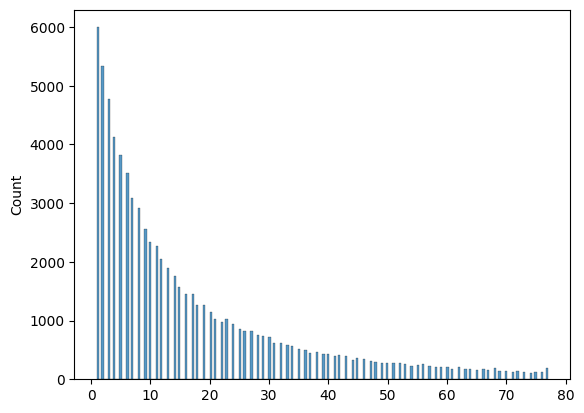

In [28]:
seaborn.histplot([i for i in list(hc_counter.values()) if i >= 0], bins=200)

In [71]:
hc_signature = set([i for i,j in hc_counter.most_common(20000)])

In [72]:
naive_signature = set([i for i, _ in naive_counter.most_common(20000)])

In [58]:
len(hc_signature.intersection(naive_signature))

18830

In [33]:
gf_other = GenomeFiltering(kmer_set)

for f in glob("../data/Other_data/*/*.fna"):
    gf_other.insert_genome(f)
    print(f)

../data/Other_data/Bacillaceae_G/GCA_003064005.1.fna
../data/Other_data/Bacillaceae_G/GCA_024915015.1.fna
../data/Other_data/Bacteroidaceae/GCA_003472875.1.fna
../data/Other_data/Bacteroidaceae/GCA_009102135.1.fna
../data/Other_data/Oscillospiraceae/GCA_017433705.1.fna
../data/Other_data/Oscillospiraceae/GCA_900772725.1.fna
../data/Other_data/Acutalibacteraceae/GCA_934839335.1.fna
../data/Other_data/Acutalibacteraceae/GCA_934477085.1.fna
../data/Other_data/Listeriaceae/GCA_003045465.1.fna
../data/Other_data/Listeriaceae/GCA_014223645.1.fna
../data/Other_data/Lactobacillaceae/GCA_001618285.1.fna
../data/Other_data/Lactobacillaceae/GCA_900080205.1.fna
../data/Other_data/Enterobacteriaceae/GCA_004309075.1.fna
../data/Other_data/Enterobacteriaceae/GCA_900487705.1.fna
../data/Other_data/Microcystaceae/GCA_009995995.1.fna
../data/Other_data/Microcystaceae/GCA_020247025.1.fna
../data/Other_data/CAG-138/GCA_012517905.1.fna
../data/Other_data/CAG-138/GCA_000431035.1.fna
../data/Other_data/Burkh

In [38]:
gf_test_species = GenomeFiltering(kmer_set)

for f in glob("../data/Staphylococcus_data/test_ood_species/*/*.fna"):
    gf_test_species.insert_genome(f)
    print(f)

../data/Staphylococcus_data/test_ood_species/Staphylococcus singaporensis/GCA_022493035.1.fna
../data/Staphylococcus_data/test_ood_species/Staphylococcus singaporensis/GCA_022493055.1.fna
../data/Staphylococcus_data/test_ood_species/Staphylococcus singaporensis/GCA_015024985.1.fna
../data/Staphylococcus_data/test_ood_species/Staphylococcus singaporensis/GCA_904830535.1.fna
../data/Staphylococcus_data/test_ood_species/Staphylococcus singaporensis/GCA_015025095.1.fna
../data/Staphylococcus_data/test_ood_species/Staphylococcus singaporensis/GCA_015025005.1.fna
../data/Staphylococcus_data/test_ood_species/Staphylococcus singaporensis/GCA_017353325.1.fna
../data/Staphylococcus_data/test_ood_species/Staphylococcus singaporensis/GCA_024916345.1.fna
../data/Staphylococcus_data/test_ood_species/Staphylococcus singaporensis/GCA_015025075.1.fna
../data/Staphylococcus_data/test_ood_species/Staphylococcus singaporensis/GCA_017353355.1.fna
../data/Staphylococcus_data/test_ood_species/Staphylococcus 

In [44]:
with open("other.pkl", "wb") as f:
    pickle.dump(gf_other, f)

with open("test_ood_species.pkl", "wb") as f:
    pickle.dump(gf_test_species, f)

with open("test_ood_strains.pkl", "wb") as f:
    pickle.dump(gf_test_strain, f)

In [43]:
gf_test_strain = GenomeFiltering(kmer_set)

for f in glob("../data/Staphylococcus_data/test_ood_strains/*/*.fna"):
    gf_test_strain.insert_genome(f)
    print(f)

../data/Staphylococcus_data/test_ood_strains/Staphylococcus devriesei/GCA_021367175.1.fna
../data/Staphylococcus_data/test_ood_strains/Staphylococcus cohnii/GCA_013602265.1.fna
../data/Staphylococcus_data/test_ood_strains/Staphylococcus saprophyticus/GCA_001747315.1.fna
../data/Staphylococcus_data/test_ood_strains/Staphylococcus gallinarum/GCA_003043855.1.fna
../data/Staphylococcus_data/test_ood_strains/Staphylococcus intermedius/GCA_002374215.1.fna
../data/Staphylococcus_data/test_ood_strains/Staphylococcus condimenti/GCA_016724565.1.fna
../data/Staphylococcus_data/test_ood_strains/Staphylococcus hominis/GCA_022689565.1.fna
../data/Staphylococcus_data/test_ood_strains/Staphylococcus equorum/GCA_003035585.1.fna
../data/Staphylococcus_data/test_ood_strains/Staphylococcus epidermidis/GCA_001622865.1.fna
../data/Staphylococcus_data/test_ood_strains/Staphylococcus chromogenes/GCA_021366735.1.fna
../data/Staphylococcus_data/test_ood_strains/Staphylococcus simiae_A/GCA_017368755.1.fna
../dat

In [73]:
train_containment_hc = []
test_species_containment_hc = []
test_strain_containment_hc = []
other_containment_hc = []
train_containment_naive = []
test_species_containment_naive = []
test_strain_containment_naive = []
other_containment_naive = []

for genome in gf.genome_dict:
    try:
        train_containment_hc.append(len(hc_signature.intersection(gf.genome_dict[genome].set)) / len(gf.genome_dict[genome].set))
        train_containment_naive.append(len(naive_signature.intersection(gf.genome_dict[genome].set)) / len(gf.genome_dict[genome].set))
    except:
        continue

for genome in gf_other.genome_dict:
    try:
        other_containment_hc.append(len(hc_signature.intersection(gf_other.genome_dict[genome].set)) / len(gf_other.genome_dict[genome].set))
        other_containment_naive.append(len(naive_signature.intersection(gf_other.genome_dict[genome].set)) / len(gf_other.genome_dict[genome].set))
    except:
        continue

for genome in gf_test_species.genome_dict:
    try:
        test_species_containment_hc.append(len(hc_signature.intersection(gf_test_species.genome_dict[genome].set)) / len(gf_test_species.genome_dict[genome].set))
        test_species_containment_naive.append(len(naive_signature.intersection(gf_test_species.genome_dict[genome].set)) / len(gf_test_species.genome_dict[genome].set))
    except:
        continue

for genome in gf_test_strain.genome_dict:
    try:
        test_strain_containment_hc.append(len(hc_signature.intersection(gf_test_strain.genome_dict[genome].set)) / len(gf_test_strain.genome_dict[genome].set))
        test_strain_containment_naive.append(len(naive_signature.intersection(gf_test_strain.genome_dict[genome].set)) / len(gf_test_strain.genome_dict[genome].set))
    except:
        continue

<Axes: >

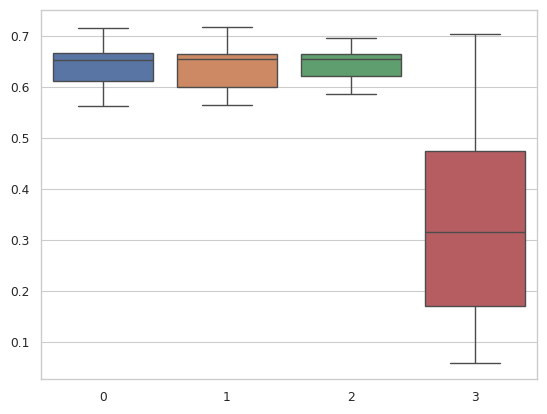

In [74]:
seaborn.set(style='whitegrid')
seaborn.set_context("paper")
seaborn.boxplot((train_containment_hc, test_strain_containment_hc, test_species_containment_hc, other_containment_hc))#["Escherichia", "Other"])

<Axes: >

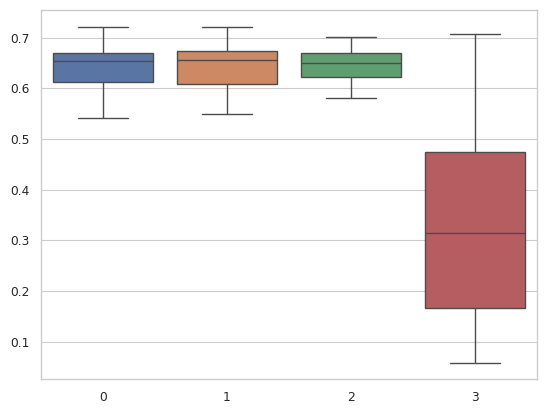

In [75]:
seaborn.boxplot((train_containment_naive, test_strain_containment_naive, test_species_containment_naive, other_containment_naive))

<Axes: >

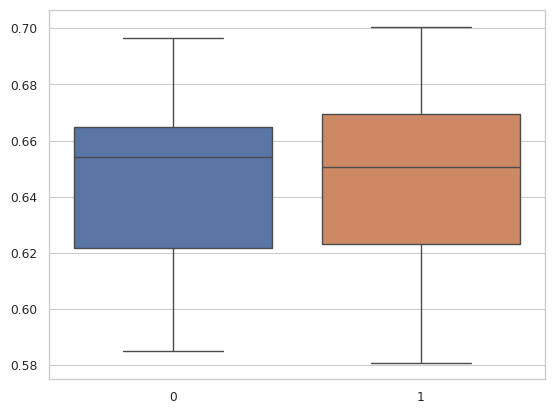

In [76]:
seaborn.boxplot((test_species_containment_hc, test_species_containment_naive))

<Axes: >

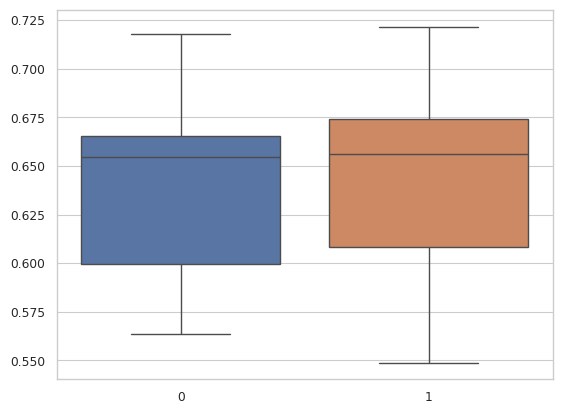

In [77]:
seaborn.boxplot((test_strain_containment_hc, test_strain_containment_naive))

<Axes: >

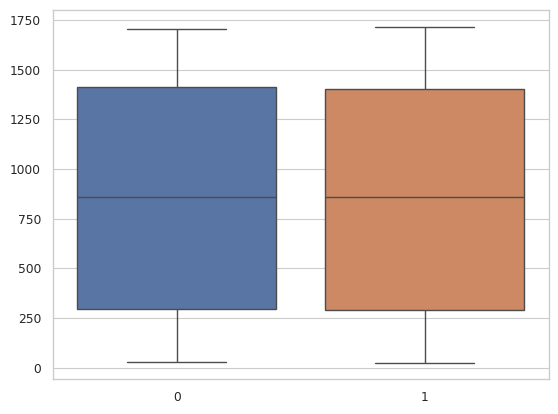

In [104]:
seaborn.boxplot((other_containment_hc, other_containment_naive))